# **SkillifyZone Internship Week2 Task**
# **Submitted By: Muhammad Usman**

## **Step 1: Import Important Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

## **Step 02: Load and Preprocess Data**

In [2]:
data = pd.read_csv('/content/StudentsPerformance.csv')
data.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [4]:
# Create target variable: Pass (1) if average score >= 60, else Fail (0)
data['average_score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3
data['Pass'] = (data['average_score'] >= 60).astype(int)
data.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,Pass
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1


In [5]:
X = data.drop(['math score', 'reading score', 'writing score', 'average_score', 'Pass'], axis=1)
y = data['Pass']
# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Verify data shapes
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (800, 17)
Testing set shape: (200, 17)


## **Step 03: Models Training**

In [7]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
dec_tree = DecisionTreeClassifier(max_depth=5, random_state=42)

log_reg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
print("Models trained successfully.")

Models trained successfully.


## **Step 04: Evaluate Models**

In [8]:
log_reg_pred = log_reg.predict(X_test)
dec_tree_pred = dec_tree.predict(X_test)

In [13]:
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, log_reg_pred):.2f}")
print(f"Precision: {precision_score(y_test, log_reg_pred):.2f}")
log_reg_cm = confusion_matrix(y_test, log_reg_pred)

Logistic Regression:
Accuracy: 0.68
Precision: 0.72


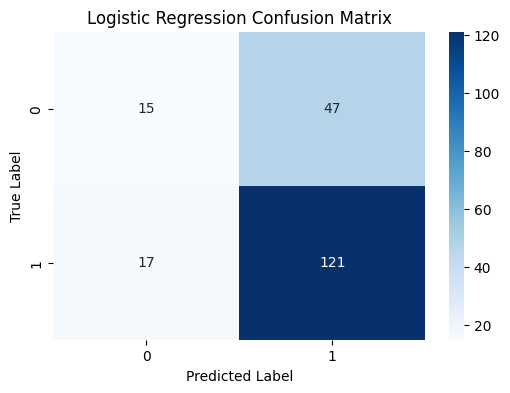

In [14]:
plt.figure(figsize=(6, 4))
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [15]:
print("\nDecision Tree:")
print(f"Accuracy: {accuracy_score(y_test, dec_tree_pred):.2f}")
print(f"Precision: {precision_score(y_test, dec_tree_pred):.2f}")
dec_tree_cm = confusion_matrix(y_test, dec_tree_pred)


Decision Tree:
Accuracy: 0.67
Precision: 0.73


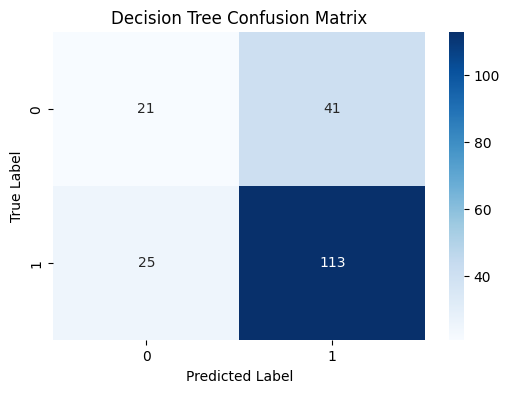

In [16]:
plt.figure(figsize=(6, 4))
sns.heatmap(dec_tree_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## **Step 05: Analyze Feature Impact**

In [17]:
# Logistic Regression Coefficients
feature_names = X.columns
log_reg_coefs = pd.DataFrame({'Feature': feature_names, 'Coefficient': log_reg.coef_[0]})
print("Logistic Regression Coefficients:")
print(log_reg_coefs.sort_values(by='Coefficient', ascending=False))

Logistic Regression Coefficients:
                                           Feature  Coefficient
6                           race/ethnicity_group E     0.659844
14                                  lunch_standard     0.638291
8    parental level of education_bachelor's degree     0.628959
15               test preparation course_completed     0.596365
0                                    gender_female     0.276525
5                           race/ethnicity_group D     0.229162
10     parental level of education_master's degree     0.188661
11        parental level of education_some college     0.077119
7   parental level of education_associate's degree    -0.046322
3                           race/ethnicity_group B    -0.193568
4                           race/ethnicity_group C    -0.235181
1                                      gender_male    -0.276457
12    parental level of education_some high school    -0.379406
2                           race/ethnicity_group A    -0.460189
9     

In [18]:
dec_tree_importance = pd.DataFrame({'Feature': feature_names, 'Importance': dec_tree.feature_importances_})
print("\nDecision Tree Feature Importance:")
print(dec_tree_importance.sort_values(by='Importance', ascending=False))


Decision Tree Feature Importance:
                                           Feature  Importance
14                                  lunch_standard    0.325028
16                    test preparation course_none    0.176222
15               test preparation course_completed    0.089265
12    parental level of education_some high school    0.071214
1                                      gender_male    0.059706
9          parental level of education_high school    0.046165
5                           race/ethnicity_group D    0.043108
6                           race/ethnicity_group E    0.042548
10     parental level of education_master's degree    0.038868
8    parental level of education_bachelor's degree    0.028613
3                           race/ethnicity_group B    0.023366
2                           race/ethnicity_group A    0.017029
4                           race/ethnicity_group C    0.016018
0                                    gender_female    0.014405
11        parental l

## **Step 06: Visualize Feature Importance**

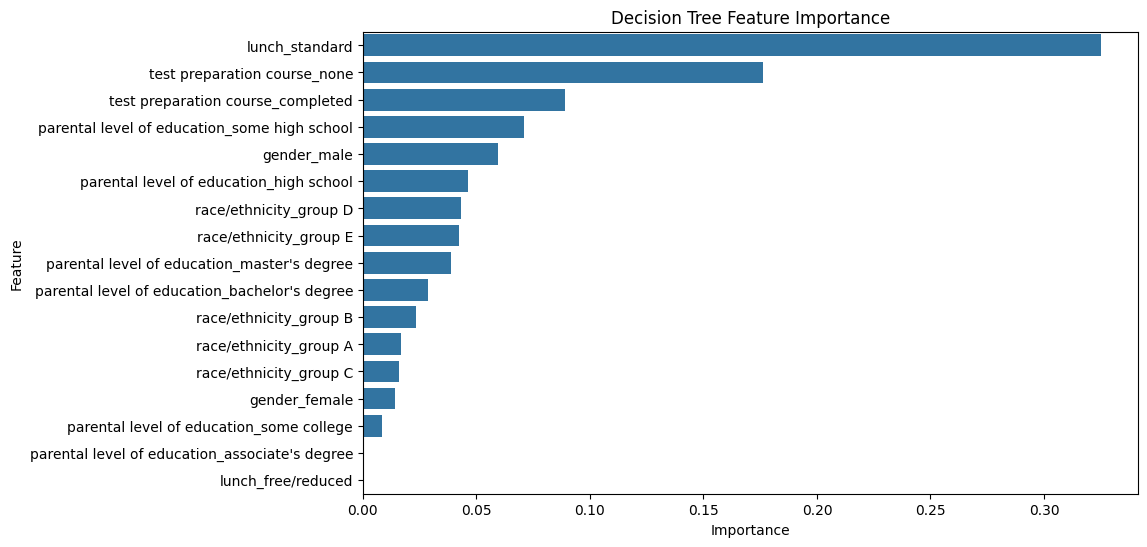

In [19]:
# Bar chart for Decision Tree feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dec_tree_importance.sort_values(by='Importance', ascending=False))
plt.title('Decision Tree Feature Importance')
plt.show()